In [1]:
from dask_gateway import Gateway
from dask_gateway.auth import BasicAuth

In [2]:
gateway = Gateway("http://lx5.etp.kit.edu:8000")
cluster = gateway.new_cluster()

GatewayClusterError: Cluster '0c1dea578b7f458c9e3a127b09f9dae9' failed to start, see logs for more information

In [5]:
gateway = Gateway("http://lx5.etp.kit.edu:8000", auth=BasicAuth(username="dask"))

In [5]:
gateway.list_clusters()

[ClusterReport<name=1924027e0a954ba5a00725c49c825cfd, status=RUNNING>]

In [7]:
#cluster = gateway.connect(cluster_name="88447da79c7e410aadb0ce738c53e9ab")
cluster = gateway.new_cluster()

GatewayClusterError: Cluster '8e331c8c5ae248368ed6c500a3b6bf61' failed to start, see logs for more information

In [21]:
cluster.scale(20)

In [22]:
client = cluster.get_client()

In [23]:
cluster

# Dask Demo 

In [24]:
import dask.array as da
a = da.random.normal(size=(100000, 100000), chunks=(500, 500))
a.mean().compute()

-1.1691966239172637e-05

# Coffea Demo (Z->mumu)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from coffea import hist
import coffea.processor as processor
import awkward as ak
from coffea.nanoevents import schemas

In [26]:
class Processor(processor.ProcessorABC):
    def __init__(self):
        dataset_axis = hist.Cat("dataset", "Dataset")
        dimu_mass_axis = hist.Bin("dimu_mass", "$\mu\mu$ Mass [GeV]", 50, 20, 120)
        
        self._accumulator = processor.dict_accumulator({
            'dimu_mass': hist.Hist("Counts", dataset_axis, dimu_mass_axis),
        })
    
    @property
    def accumulator(self):
        return self._accumulator
    
    def process(self, events):
        output = self.accumulator.identity()
        
        dataset = events.metadata["dataset"]
        mu = events.Muon
        dimu_neutral = mu[(ak.num(mu) == 2) & (ak.sum(mu.charge, axis=1) == 0)]
        dimu_mass = (dimu_neutral[:, 0] + dimu_neutral[:, 1]).mass
        output['dimu_mass'].fill(dataset=dataset, dimu_mass=dimu_mass)
        return output

    def postprocess(self, accumulator):
        return accumulator


In [27]:
fileset = {'DoubleMu' : ['root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/0555868D-6B32-D249-9ED1-6B9A6AABDAF7.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/07796DC0-9F65-F940-AAD1-FE82262B4B03.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/09BED5A5-E6CC-AC4E-9344-B60B3A186CFA.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/0BA8AE9C-DD73-5C4A-8CEE-D2583EED2987.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/0EE26CB3-281A-F044-928C-71C484801A88.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/10B55DFA-0821-2F4C-A167-4C32E9E9CB46.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/139A9CD3-523E-EB4A-88D0-C383A7965FCF.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/1D5F5E8C-ACED-6B4B-89BC-CB73AC1B0A0D.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/2045B46A-1140-4748-876A-4D47867899E3.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/2665B2E8-1135-AF40-82D1-5F142261B4EE.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/276A1513-927A-5D46-A5C3-8C26C76EB3FB.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/2B1F690D-1EC2-CD40-8F73-C9587BC2A1FD.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/2BB811DE-6C90-4D46-9BA7-F1FDAA7E4886.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/343CC4BB-33EA-7244-BD1A-7E4D75B167DB.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/346BDAA9-2646-7943-A07F-FD45AF6D4F0A.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/3A4CF01C-4DC4-9345-998C-2D875B329FBC.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/3DDD5A3F-D9CD-E14C-9D84-B4E64A1768DD.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/433C25FD-1E20-1A4A-9414-16E1D52F2CBE.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/46420107-37F1-DF41-B3B9-4E882D5C0C1B.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/46C9FECE-6771-0F40-A3AC-FCD297C227BA.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/495F2094-64A7-E74B-9072-480C8926C600.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/4B9A1B22-666D-7A4C-96AC-5F5D9D305E0C.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/4CB9A28F-BD33-4A4A-9AF3-C9D93C2C9CB5.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/53D11EEE-D3BE-6B41-A7C0-8056B7923ACF.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/54C285EB-2965-3F45-B6D0-4EAF80435FC3.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/57CDDE17-6579-294D-A42B-9C1FD01F9309.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/5AADA718-F7B6-B64B-BD12-B589FD69BBB6.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/5E146028-F9DA-DF4B-88A3-265E254D867D.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/609C12B9-B0F5-0A45-9D1C-B6DE2EE2C8C6.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/628748C1-F73D-CE4E-BF35-B4A653C02DB9.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/6331F65C-DFBF-7149-8743-3E0A24430492.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/635645AE-A795-D64C-A422-54E793B4258C.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/666B3844-A712-9547-9099-3DA8A027AF31.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/6E66CDDA-1D07-A649-91B7-234DE3849C24.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/71213F8D-F11C-5546-94B7-3CD4F3017CF3.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/712948FD-7CF8-B84E-A8DE-80CB4D7F2EE4.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/721784AD-5030-6146-B8B2-5D6C6EBF02E1.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/79C584F0-5E43-4144-8BA3-558B39A6CD2A.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/7C09B2FE-4DD0-2C41-BE19-A53FFCE7E12E.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/7C137374-E8E4-0646-93E5-0D0C85E73056.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/8C35337D-20A7-ED42-9858-63BCCFD2A461.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/8CBC98D1-B188-5148-9BC7-841EEC81B624.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/8E999177-B3F9-EE4E-8E89-95A2FB621C19.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/923AF931-4B5E-A04B-B1CA-A0893B729767.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/946474E3-8B93-AC4C-9DD8-56CD890B5532.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/9C9EACD1-5400-1D45-B2B9-B90BE1895D6A.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/9ECE7BB3-57F2-AE47-8EC7-A664E5F07EB0.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/A3ED35CF-CC16-6C44-8BD2-CE09AA3CA843.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/A8C82CB7-3094-9F4D-A8C3-36D4AA92D2C1.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/A8D31937-AC8B-A542-B830-0384FA372B1D.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/A9C84EEB-BE63-E548-9A0F-76E3D0256C5B.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/AA391086-4A93-C646-98BD-28C7F2E34253.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/AD63A27E-7342-5A4C-95F2-4FB6E1B8B6D4.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/AD8A8927-5783-C243-8E59-C2281E510D0F.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/AE9CEFEA-8069-6A4C-A2E4-7D4699E92299.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/B5E993D5-9533-7045-979C-9D724835C62E.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/B64FB825-9CA1-574B-8394-C671E6707D55.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/BA073491-215E-2241-B866-C2276FEDFA98.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/BF39D8A1-4603-7544-A930-593BB93CA2BE.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/C51A4416-4D2B-AD47-B3D6-29EA9F5D8CE7.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/C7E969E4-29A1-984A-8527-C8E44964450B.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/C83EA9E0-AF1B-0F41-B1C1-4BAD869BA9E4.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/C841E007-F4FF-D347-84C7-F6F0B3B98606.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/C9D9A02C-C192-6547-9C9A-4CC85F006A26.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/CD25F914-CA18-2847-989C-91E6BF71E22F.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/CFB7EA86-E446-F442-B92F-A9429F3A29C3.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/D652898C-ACE8-1C4E-84DE-3E34432B7B82.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/DA4806B9-DCFC-E344-AA87-D13F3C158E29.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/DD6D5FC5-534B-A94D-8242-2002A0A764B2.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/DEA073D8-82BA-F14C-A40D-D15C7246D5CF.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/DF26F2C2-8761-2D4A-953B-75128F50DEDD.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/E11C4036-174D-214E-8D56-811BE213B429.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/E164452D-3810-6F4C-9FEA-EAD991901C98.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/EAC3C712-C1D8-6446-BE01-08C44EB55C08.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/EB58749F-202D-6942-A562-9585843A62FE.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/EEC20024-C194-DB46-BCB1-B3C149972AC7.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/F16C5A5E-EF95-1D40-A0C3-BA441FF790EC.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/F1AF68A7-0E43-704F-95ED-F021EA729E09.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/F4BB10CD-C611-F444-B236-41A4DA3BCDC9.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/F593578D-D6BA-AC4D-97BF-705403892148.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/F60CC6BE-5AA3-1F4C-8563-6B51945C9441.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/FA184AF9-7AA9-9D4E-A9F7-58CE06938995.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/FA93A4BF-AF81-5B4B-BD4E-BEC08EE0C68D.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/FBC838D5-BD98-E649-8682-72BAFA819D8F.root',
                         'root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/data/Run2018A/DoubleMuon/NANOAOD/02Apr2020-v1/30000/FF6E5147-5AA7-3640-9F30-FA49DD27073C.root']}

executor = processor.DaskExecutor(client=client)

run = processor.Runner(executor=executor,
                       schema=schemas.NanoAODSchema,
                      )

output = run(fileset, "Events", processor_instance=Processor())

<AxesSubplot:xlabel='$\\mu\\mu$ Mass [GeV]', ylabel='Counts'>

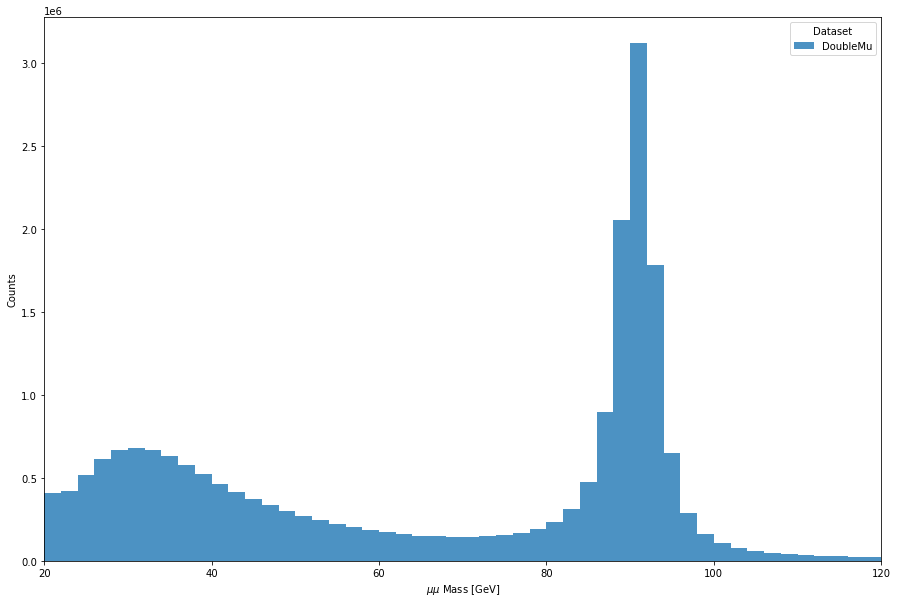

In [28]:
plt.figure(figsize=(15, 10))
hist.plot1d(output['dimu_mass'], overlay='dataset', fill_opts={'edgecolor': (0,0,0,0.3), 'alpha': 0.8})

In [29]:
cluster.shutdown()

/opt/conda/lib/python3.9/site-packages/dask_gateway/client.py:1014: RuntimeWarning: coroutine 'rpc.close_rpc' was never awaited
  self.scheduler_comm.close_rpc()
